In [1]:
import os
import pandas as pd
result={}
for root,folder,files in os.walk('/home2/nye/SH_MH_W/RadiomicFeatureSeclection/'):
    if 'X_train.plk' in files:
        temp=pd.read_pickle(os.path.join(root,'X_train.plk'))
        result[root.split('/')[-1]]=temp

In [6]:
train=[]
for i in result.keys():
    train.extend(list(set(result[i].index)))
Train=list(set(train))

In [10]:
import pickle
with open('/home2/nye/SH_MH_W/RadiomicFeatureSeclection/ADC/FeatureSelectionResult.plk','rb') as f:
    test=pickle.load(f)

In [221]:
for i in test['FeatureUse'].keys():
    print(i,len(test['FeatureUse'][i]))

NameError: name 'test' is not defined

In [1]:
200000/5000

40.0

In [2]:
import pickle
with open('/home1/nye/SH_MH_W/FinialDf_part1/FinialDfDict_1_756.plk','rb') as f:
    FinialDfDict_1=pickle.load(f)

In [4]:
for i in FinialDfDict_1.keys():
    if 'T1_1' in i:
        print(i)

T2.B800.B0.T1_1-None
T2.B800.B0.T1_1-ANOVA_Selection
T2.B800.B0.T1_1-RecrusiveSVMLinear
T2.B800.B0.T1_1-RecrusiveSVMLinearL1
T2.B800.B0.T1_1-RecrusiveTree
T2.B800.B0.T1_1-TreeSelect
T2.B800.B0.T1_1-SVMLinearSelect
T2.B800.B0.T1_1-SVMLinearL1Select
T2.B800.B0.T1_1-LinearSelect
T2.B800.B0.T1_1-RidgeSelect
T2.B800.B0.T1_1-LassoSelect
T2.B800.B0.T1_1-MRMR
T2.ADC.T1_3.T1_1-None
T2.ADC.T1_3.T1_1-ANOVA_Selection
T2.ADC.T1_3.T1_1-RecrusiveSVMLinear
T2.ADC.T1_3.T1_1-RecrusiveSVMLinearL1
T2.ADC.T1_3.T1_1-RecrusiveTree
T2.ADC.T1_3.T1_1-TreeSelect
T2.ADC.T1_3.T1_1-SVMLinearSelect
T2.ADC.T1_3.T1_1-SVMLinearL1Select
T2.ADC.T1_3.T1_1-LinearSelect
T2.ADC.T1_3.T1_1-RidgeSelect
T2.ADC.T1_3.T1_1-LassoSelect
T2.ADC.T1_3.T1_1-MRMR
T2.ADC.B0.T1_1-None
T2.ADC.B0.T1_1-ANOVA_Selection
T2.ADC.B0.T1_1-RecrusiveSVMLinear
T2.ADC.B0.T1_1-RecrusiveSVMLinearL1
T2.ADC.B0.T1_1-RecrusiveTree
T2.ADC.B0.T1_1-TreeSelect
T2.ADC.B0.T1_1-SVMLinearSelect
T2.ADC.B0.T1_1-SVMLinearL1Select
T2.ADC.B0.T1_1-LinearSelect
T2.ADC.B0.T1

In [8]:
with open('./PreSelectionPipe20181027/PreSelectionResult_0_20181027.plk','rb') as f:
    Result0=pickle.load(f)

In [9]:
 Result0.keys()

dict_keys([('T2', 'T2'), ('DWI', 'ADC'), ('DWI', 'B800'), ('DWI', 'B0'), ('T1', 'T1_3'), ('T1', 'T1_1')])

In [10]:
Result0[('T2', 'T2')].keys()

dict_keys(['NoClincialInform', 'S0_DfColumnsRaw', 'y', 'S1_HaveNa', 'S2_LowVariance', 'S3_LowICC', 'X_df', 'S4_ColumnsLeft'])

In [15]:
DfAll=Result0[('T2', 'T2')]['X_df']
for i in [('DWI', 'ADC'), ('DWI', 'B800'), ('DWI', 'B0'), ('T1', 'T1_3'), ('T1', 'T1_1')]:
    temp=Result0[i]['X_df']
    DfAll=DfAll.join(temp,how='outer')

In [40]:
DfAll.to_pickle('./BaseInform/AllRadiomicFeatures20181029.plk')

In [22]:
!mkdir ./Test/test_predict

In [21]:
XTest.shape

(23, 2238)

In [18]:
XTrain=FinialDfDict_1['T2.B800.T1_1-None']

In [20]:
from subprocess import call
XTest=DfAll.loc[~DfAll.index.isin(XTrain.index),XTrain.columns].dropna(axis=0)

In [28]:
XTrain.to_pickle('./Test/test_predict/XTrain.plk',protocol=2)
XTest.to_pickle('./Test/test_predict/XTest.plk',protocol=2)

In [24]:
import pandas as pd

ClinialInform=pd.read_excel('./BaseInform/PTC-segement20181026.xlsx')

# when extract radiomic we should remove 11 phase T1(some images)
# remove cant use Image
# do it next time
ClinialInform.head()

# ClinialInform=pd.read_excel('./PTC_Use1.xlsx')
ClinialInform1=ClinialInform.loc[ClinialInform.Delete==0,:]

ClinialInform1.loc[:,'ID']=ClinialInform1.ID.astype(str)
ClinialInform2=ClinialInform1.set_index('ID')


ClinialInform2.shape

from sklearn.preprocessing import LabelEncoder 
import numpy as np
y_raw=ClinialInform1.loc[:,'aggressive']
y_raw_array=np.array(y_raw)
y_pre=np.where(y_raw_array==0,0,1)
encode=LabelEncoder()
y=encode.fit_transform(y_pre)
ClinialInform2.loc[:,'y']=y


/home/nye/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
ClinialInform2.to_pickle('./BaseInform/yDf.plk',protocol=2)

In [220]:
FinialDfDict_1.keys()

dict_keys(['ADC.B800.B0.T1_3-None', 'ADC.B800.B0.T1_3-ANOVA_Selection', 'ADC.B800.B0.T1_3-RecrusiveSVMLinear', 'ADC.B800.B0.T1_3-RecrusiveSVMLinearL1', 'ADC.B800.B0.T1_3-RecrusiveTree', 'ADC.B800.B0.T1_3-TreeSelect', 'ADC.B800.B0.T1_3-SVMLinearSelect', 'ADC.B800.B0.T1_3-SVMLinearL1Select', 'ADC.B800.B0.T1_3-LinearSelect', 'ADC.B800.B0.T1_3-RidgeSelect', 'ADC.B800.B0.T1_3-LassoSelect', 'ADC.B800.B0.T1_3-MRMR', 'T2-None', 'T2-ANOVA_Selection', 'T2-RecrusiveSVMLinear', 'T2-RecrusiveSVMLinearL1', 'T2-RecrusiveTree', 'T2-TreeSelect', 'T2-SVMLinearSelect', 'T2-SVMLinearL1Select', 'T2-LinearSelect', 'T2-RidgeSelect', 'T2-LassoSelect', 'T2-MRMR', 'T2.B800.B0.T1_1-None', 'T2.B800.B0.T1_1-ANOVA_Selection', 'T2.B800.B0.T1_1-RecrusiveSVMLinear', 'T2.B800.B0.T1_1-RecrusiveSVMLinearL1', 'T2.B800.B0.T1_1-RecrusiveTree', 'T2.B800.B0.T1_1-TreeSelect', 'T2.B800.B0.T1_1-SVMLinearSelect', 'T2.B800.B0.T1_1-SVMLinearL1Select', 'T2.B800.B0.T1_1-LinearSelect', 'T2.B800.B0.T1_1-RidgeSelect', 'T2.B800.B0.T1_1-L

In [52]:
Root='/home2/nye/SH_MH_W/PredictionResult/'
YdfPath='/home/nye/Documents/SH_MH_W/BaseInform/yDf.plk'
Dict=FinialDfDict_1
import os
def tempfun_prediction(i):
    Result,NeedCheck={},{}
    Path=os.path.join(Root,i)
    try:
        os.makedirs(Path)
    except:
        pass
    XTrain=Dict[i]
    XTest=DfAll.loc[~DfAll.index.isin(XTrain.index),XTrain.columns].dropna(axis=0)
    XTrainPath=os.path.join(Path,'XTrain.plk')
    XTestPath=os.path.join(Path,'XTest.plk')
    
    XTrain.to_pickle(XTrainPath)
    XTest.to_pickle(XTestPath)
    a=call(['/home/nye/Documents/Machine_Learning/PredictionPipeline.py',
          '-X',XTrainPath,'-x',XTestPath,'-Y',YdfPath,'-o',Path])
    if a==0:
        Result={'FinialFilePath':os.path.join(Path,'PredictionResultDict.plk'),
                'Group':1,'FeatureSelectionMethod':i.split('-')[1],'ImageUse':i.split('-')[0],'NumberOfImageUse':len(i.split('.'))}
    else:
        NeedCheck={'ID':i}
    return Result,NeedCheck

In [50]:
tempfun_prediction('ADC.B800.B0.T1_3-None')

({'FeatureSelectionMethod': 'None',
  'FinialFilePath': '/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B0.T1_3-None/PredictionResultDict.plk',
  'Group': 1,
  'ImageUse': 'ADC.B800.B0.T1_3'},
 {})

In [54]:
from multiprocessing import Pool
# PredictionResult_preDf=list(Pool(processes=20).imap(tempfun_prediction,FinialDfDict_1.keys()))

In [296]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score
def ReadResult(Df):
    ResultTableUse={}
    n=0    
    for i in Df.index:
        MLA=Df.MLA[i]
        ResultTableUse[n]={'MachineLearningAlgorithms':MLA}
        for g in ['test','train']:
            y=Df.loc[i,'y_%s' %g]
            y_predict=Df.loc[i,'y_%s_predict' %g]
            
            temp=pd.Series(list(zip(y,y_predict))).value_counts()
            try:
                tp=temp[(1,1)]
            except:
                tp=0
            try:
                tn=temp[(0,0)]
            except:
                tn=0
            try:
                fp=temp[(0,1)]
            except:
                fp=0
            try:
                fn=temp[(1,0)]
            except:
                fn=0
            AUC=Df.loc[i,'auc_%s' %g]
            AUC_score=roc_auc_score(y,y_predict)
            Precision=precision_score(y,y_predict)#tp / (tp + fp)
            TPR_Sensitivity=recall_score(y,y_predict)#tp / (tp + fn)
            Accuracy=accuracy_score(y,y_predict)
            try:
                TNR_Specificity=tn/(tn+fp)
            except:
                TNR_Specificity=0
            Dict=dict(list(zip(['_'.join([string,g]) for string in ['Precision','TPR_Sensitivity','Accuracy','TNR_Specificity','AUC','AUC_Score']],
                 [Precision,TPR_Sensitivity,Accuracy,TNR_Specificity,AUC,AUC_score])))
            ResultTableUse[n].update(Dict)
        n+=1
    ResultTableUseDf=pd.DataFrame(ResultTableUse).T
    return ResultTableUseDf

In [297]:
Root='/home2/nye/SH_MH_W/PredictionResult/'
# YdfPath='/home/nye/Documents/SH_MH_W/BaseInform/yDf.plk'
Dict=FinialDfDict_1
import os
def tempfun_Result(i):
    Result,NeedCheck={},{}
    Path=os.path.join(Root,i)
    ResultPath=os.path.join(Path,'PredictionResultDict.plk')
    ResultDf=os.path.join(Path,'PredictionResultDf_Finial.csv')
    with open(ResultPath,'rb') as f:
        PredictionResult=pickle.load(f)
    Df=pd.DataFrame(PredictionResult['ROC_Result']).T
    DfUse=ReadResult(Df)
    DfUse.to_csv(ResultDf)
    RawDict={'Group':1,'ResultRawPath':ResultPath,'ResultSummaryDf':ResultDf,
             'FeatureSelectionMethod':i.split('-')[1],
             'ImageUse':i.split('-')[0],'NumberOfImageUse':len(i.split('.'))}
    
#     else:
#         NeedCheck={'ID':i}
    return RawDict

In [298]:

tempfun_Result('ADC.B800.B0.T1_3-None')

{'FeatureSelectionMethod': 'None',
 'Group': 1,
 'ImageUse': 'ADC.B800.B0.T1_3',
 'NumberOfImageUse': 4,
 'ResultRawPath': '/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B0.T1_3-None/PredictionResultDict.plk',
 'ResultSummaryDf': '/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B0.T1_3-None/PredictionResultDf_Finial.csv'}

In [299]:
ResultSummaryList=list(map(tempfun_Result,FinialDfDict_1.keys()))

/home/nye/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [300]:
ResultFileSummaryDf=pd.DataFrame(dict(enumerate(ResultSummaryList))).T

In [301]:
ResultFileSummaryDf.head()

,FeatureSelectionMethod,Group,ImageUse,NumberOfImageUse,ResultRawPath,ResultSummaryDf
0,None,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...
1,ANOVA_Selection,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...
2,RecrusiveSVMLinear,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...
3,RecrusiveSVMLinearL1,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...
4,RecrusiveTree,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...


In [302]:
ResultFileSummaryDf.to_excel('./BaseInform/ResultFileSummaryDf_Finial.xlsx')

In [270]:
import itertools
temp=[]
for i in range(1,4):
    temp.extend(list(map(lambda x:'.'.join(x),list(itertools.combinations(['T2','ADC','T1_3'], i)))))

In [303]:
# for i in temp:
temp1=ResultFileSummaryDf.loc[ResultFileSummaryDf.ImageUse.isin(temp),:]

In [274]:
temp1.head()

,FeatureSelectionMethod,Group,ImageUse,NumberOfImageUse,ResultRawPath,ResultSummaryDf
12,None,1,T2,1,/home2/nye/SH_MH_W/PredictionResult/T2-None/Pr...,/home2/nye/SH_MH_W/PredictionResult/T2-None/Pr...
13,ANOVA_Selection,1,T2,1,/home2/nye/SH_MH_W/PredictionResult/T2-ANOVA_S...,/home2/nye/SH_MH_W/PredictionResult/T2-ANOVA_S...
14,RecrusiveSVMLinear,1,T2,1,/home2/nye/SH_MH_W/PredictionResult/T2-Recrusi...,/home2/nye/SH_MH_W/PredictionResult/T2-Recrusi...
15,RecrusiveSVMLinearL1,1,T2,1,/home2/nye/SH_MH_W/PredictionResult/T2-Recrusi...,/home2/nye/SH_MH_W/PredictionResult/T2-Recrusi...
16,RecrusiveTree,1,T2,1,/home2/nye/SH_MH_W/PredictionResult/T2-Recrusi...,/home2/nye/SH_MH_W/PredictionResult/T2-Recrusi...


In [277]:
temp1.ResultSummaryDf[12]

'/home2/nye/SH_MH_W/PredictionResult/T2-None/PredictionResultDf1.csv'

In [281]:
Temp=pd.read_csv('/home2/nye/SH_MH_W/PredictionResult/T2-None/PredictionResultDf1.csv',index_col=0)

In [304]:
T2ADCT1_all=pd.DataFrame(columns=list(Temp.columns)+['FilePath'])
for i in temp1.index:
    FilePath=temp1.ResultSummaryDf[i]
    CSV=pd.read_csv(FilePath,index_col=0)
    CSV.loc[:,'FilePath']=FilePath
    T2ADCT1_all=pd.concat([T2ADCT1_all,CSV],ignore_index=True)


In [305]:
T2ADCT1_all.head()

,AUC_Score_test,AUC_Score_train,AUC_test,AUC_train,Accuracy_test,Accuracy_train,FilePath,MachineLearningAlgorithms,Precision_test,Precision_train,TNR_Specificity_test,TNR_Specificity_train,TPR_Sensitivity_test,TPR_Sensitivity_train
0,0.621429,1.000000,0.607143,1.000000,0.625000,1.000000,/home2/nye/SH_MH_W/PredictionResult/T2-None/Pr...,AdaBoostClassifier,0.545455,1.0,0.642857,1.0,0.6,1.000000
1,0.692857,0.974359,0.778571,0.997711,0.708333,0.978947,/home2/nye/SH_MH_W/PredictionResult/T2-None/Pr...,BaggingClassifier,0.666667,1.0,0.785714,1.0,0.6,0.948718
2,0.585714,1.000000,0.632143,1.000000,0.583333,1.000000,/home2/nye/SH_MH_W/PredictionResult/T2-None/Pr...,ExtraTreesClassifier,0.500000,1.0,0.571429,1.0,0.6,1.000000
3,0.607143,1.000000,0.678571,1.000000,0.625000,1.000000,/home2/nye/SH_MH_W/PredictionResult/T2-None/Pr...,GradientBoostingClassifier,0.555556,1.0,0.714286,1.0,0.5,1.000000
4,0.678571,0.974359,0.621429,0.999542,0.708333,0.978947,/home2/nye/SH_MH_W/PredictionResult/T2-None/Pr...,RandomForestClassifier,0.714286,1.0,0.857143,1.0,0.5,0.948718


In [106]:
ResultFileSummaryDf.columns

Index(['FeatureSelectionMethod', 'Group', 'ImageUse', 'NumberOfImageUse',
       'ResultRawPath', 'ResultSummaryDf'],
      dtype='object')

In [306]:
T2ADCT1_all.rename(columns={'FilePath':'ResultSummaryDf'},inplace=True)

In [307]:
FinialDf=pd.merge(ResultFileSummaryDf,T2ADCT1_all,on='ResultSummaryDf')

In [308]:
FinialDf.to_excel('./Result/T2ADCT1_all_Finial.xlsx')

In [49]:
import pandas as pd
T2ADCT1C=pd.read_excel('./Result//T2ADCT1_all.xlsx')

In [5]:
T2ADCT1CFinial=T2ADCT1C.sort_values('AUC_test',ascending=False).drop_duplicates('ImageUse')

In [6]:
T2ADCT1CFinial.to_excel('./Result/T2ADCT1CFinial20181108.xlsx')

In [7]:
T2ADCT1CFinial.head()

,FeatureSelectionMethod,Group,ImageUse,NumberOfImageUse,ResultRawPath,ResultSummaryDf,AUC_test,AUC_train,Accuracy_test,Accuracy_train,MachineLearningAlgorithms,Precision_test,Precision_train,TNR_Specificity_test,TNR_Specificity_train,TPR_Sensitivity_test,TPR_Sensitivity_train
487,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.884615,1.000000,0.869565,1.000000,GradientBoostingClassifier,0.769231,1.000000,0.769231,1.000000,1.0,1.000000
1074,None,1,T2.ADC,2,/home2/nye/SH_MH_W/PredictionResult/T2.ADC-Non...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC-Non...,0.884615,1.000000,0.869565,1.000000,ExtraTreeClassifier,0.769231,1.000000,0.769231,1.000000,1.0,1.000000
1805,LassoSelect,1,T2.T1_3,2,/home2/nye/SH_MH_W/PredictionResult/T2.T1_3-La...,/home2/nye/SH_MH_W/PredictionResult/T2.T1_3-La...,0.878571,0.965430,0.875000,0.968421,BaggingClassifier,0.818182,0.973684,0.857143,0.982143,0.9,0.948718
1555,LassoSelect,1,ADC.T1_3,2,/home2/nye/SH_MH_W/PredictionResult/ADC.T1_3-L...,/home2/nye/SH_MH_W/PredictionResult/ADC.T1_3-L...,0.834615,0.844522,0.826087,0.861702,NuSVC,0.750000,0.906250,0.769231,0.945455,0.9,0.743590
879,RecrusiveSVMLinearL1,1,T1_3,1,/home2/nye/SH_MH_W/PredictionResult/T1_3-Recru...,/home2/nye/SH_MH_W/PredictionResult/T1_3-Recru...,0.828571,1.000000,0.833333,1.000000,XGBClassifier,0.800000,1.000000,0.857143,1.000000,0.8,1.000000


In [4]:
T2ADCT1C=pd.read_excel('./Result/T2ADCT1_all_Finial.xlsx')
T2ADCT1C_top5New=T2ADCT1C.loc[T2ADCT1C.ImageUse=='T2.ADC.T1_3',:].sort_values('AUC_test',ascending=False).head(5)
T2ADCT1C_top5New.to_excel('./Result/T2ADCT1C_top5New.xlsx')

In [311]:
T2ADCT1C_top5New

,FeatureSelectionMethod,Group,ImageUse,NumberOfImageUse,ResultRawPath,ResultSummaryDf,AUC_Score_test,AUC_Score_train,AUC_test,AUC_train,Accuracy_test,Accuracy_train,MachineLearningAlgorithms,Precision_test,Precision_train,TNR_Specificity_test,TNR_Specificity_train,TPR_Sensitivity_test,TPR_Sensitivity_train
499,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.757692,0.917379,0.923077,0.958689,0.739130,0.924731,NuSVC,0.642857,0.944444,0.615385,0.962963,0.9,0.871795
487,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.884615,1.000000,0.915385,1.000000,0.869565,1.000000,GradientBoostingClassifier,0.769231,1.000000,0.769231,1.000000,1.0,1.000000
485,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.784615,0.974359,0.907692,1.000000,0.782609,0.978495,BaggingClassifier,0.727273,1.000000,0.769231,1.000000,0.8,0.948718
498,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.719231,0.891738,0.907692,0.944444,0.695652,0.903226,SVC,0.600000,0.941176,0.538462,0.962963,0.9,0.820513
421,SVMLinearL1Select,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.723077,1.000000,0.907692,1.000000,0.739130,1.000000,GradientBoostingClassifier,0.750000,1.000000,0.846154,1.000000,0.6,1.000000


In [312]:
import pickle
ResultList=[]
Df=T2ADCT1C_top5New
for i in Df.index:
    PLKpath=Df.ResultRawPath[i]
    FeatureS=Df.FeatureSelectionMethod[i]
    MachinL=Df.MachineLearningAlgorithms[i]
    with open(PLKpath,'rb') as f:
        Use=pickle.load(f)
    MLA=list(filter(lambda x:x.__class__.__name__==MachinL,Use['MLA']))[0]
    try:
        FeatureImportance=MLA.feature_importances_
    except:
        FeatureImportance=None
    
    FeaturesUse=FinialDfDict_1['-'.join(['T2.ADC.T1_3',FeatureS])]
    Features=list(FeaturesUse.columns)
    Result={'FeatureSelectionMethod':FeatureS,'MachineLearningAlgorithms':MachinL,
            'FeatureSelected_Nub':len(Features),'FeatureSelected_Name':Features,
            'FeatureImportance':FeatureImportance,
            'MLA':MLA}
    ResultList.append(Result)

In [313]:
pd.DataFrame(dict(enumerate(ResultList))).T

,FeatureImportance,FeatureSelected_Name,FeatureSelected_Nub,FeatureSelectionMethod,MLA,MachineLearningAlgorithms
0,None,"[T2_original_shape_Maximum2DDiameterColumn, T2...",8,LassoSelect,"NuSVC(cache_size=200, class_weight=None, coef0...",NuSVC
1,"[0.0605546232600404, 0.11850744284134854, 0.17...","[T2_original_shape_Maximum2DDiameterColumn, T2...",8,LassoSelect,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingClassifier
2,None,"[T2_original_shape_Maximum2DDiameterColumn, T2...",8,LassoSelect,"(DecisionTreeClassifier(class_weight=None, cri...",BaggingClassifier
3,None,"[T2_original_shape_Maximum2DDiameterColumn, T2...",8,LassoSelect,"SVC(C=1.0, cache_size=200, class_weight=None, ...",SVC
4,"[2.7340639831696566e-05, 0.009260741441690912,...","[T2_exponential_glszm_GrayLevelNonUniformity, ...",68,SVMLinearL1Select,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingClassifier


In [314]:
MLA_Use=pd.DataFrame(dict(enumerate(ResultList))).T

In [315]:
Root='./Result/'
import os
for i in MLA_Use.index:
    FeatureImportance=MLA_Use.FeatureImportance[i]
    FeatureSelected_Name=MLA_Use.FeatureSelected_Name[i]
    FeatureSelectionMethod=MLA_Use.FeatureSelectionMethod[i]
    MachineLearningAlgorithms=MLA_Use.MachineLearningAlgorithms[i]
    try:
        len(FeatureImportance)

        FeatureImportanceDf=pd.DataFrame(dict(enumerate([{'Image':re.sub('T1_3','T1C',x).split('_')[0],
                                                'FilterUse':re.sub('T1_3','T1C',x).split('_')[1],
                                                'FeatureGroupUse':re.sub('T1_3','T1C',x).split('_')[2],
                                                'FeatureUse':re.sub('T1_3','T1C',x).split('_')[3],
                                                'FeatureImportance':y} for x,y in zip(FeatureSelected_Name,FeatureImportance)]))).T 
        FeatureImportanceDf.sort_values('FeatureImportance',ascending=False,inplace=True)
        FeatureImportanceDf.to_excel(os.path.join(Root,'_'.join([FeatureSelectionMethod,MachineLearningAlgorithms])+'.xlsx'))
    except:
        print('hh')
#         pass

hh
hh
hh


In [316]:
# overlaped features
MLA_Use.head()

,FeatureImportance,FeatureSelected_Name,FeatureSelected_Nub,FeatureSelectionMethod,MLA,MachineLearningAlgorithms
0,None,"[T2_original_shape_Maximum2DDiameterColumn, T2...",8,LassoSelect,"NuSVC(cache_size=200, class_weight=None, coef0...",NuSVC
1,"[0.0605546232600404, 0.11850744284134854, 0.17...","[T2_original_shape_Maximum2DDiameterColumn, T2...",8,LassoSelect,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingClassifier
2,None,"[T2_original_shape_Maximum2DDiameterColumn, T2...",8,LassoSelect,"(DecisionTreeClassifier(class_weight=None, cri...",BaggingClassifier
3,None,"[T2_original_shape_Maximum2DDiameterColumn, T2...",8,LassoSelect,"SVC(C=1.0, cache_size=200, class_weight=None, ...",SVC
4,"[2.7340639831696566e-05, 0.009260741441690912,...","[T2_exponential_glszm_GrayLevelNonUniformity, ...",68,SVMLinearL1Select,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingClassifier


In [325]:
MLA_Use.to_pickle('./Result/MLAUse.plk')

In [317]:
a=set(MLA_Use.FeatureSelected_Name[0])

for i in MLA_Use.FeatureSelected_Name:
    a=a.intersection(i)

a

{'ADC_log-sigma-2-mm-3D_firstorder_Skewness',
 'ADC_original_shape_MajorAxis',
 'ADC_square_glcm_Correlation',
 'T1_3_log-sigma-2-mm-3D_glcm_ClusterProminence',
 'T2_wavelet-LH_gldm_DependenceVariance'}

In [119]:
T2ADCT1C_3Use.ResultRawPath[487]

'/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_3-LassoSelect/PredictionResultDict.plk'

In [120]:
DfAll=pd.concat([pd.read_pickle('/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_3-LassoSelect/XTest.plk'),
                 pd.read_pickle('/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_3-LassoSelect/XTrain.plk')])

In [132]:
Y=pd.read_pickle('/home/nye/Documents/SH_MH_W/BaseInform/yDf.plk')

In [135]:
DfAll.head()

,T2_original_shape_Maximum2DDiameterColumn,T2_squareroot_glszm_ZoneEntropy,T2_wavelet-LH_gldm_DependenceVariance,ADC_log-sigma-2-mm-3D_firstorder_Skewness,ADC_original_shape_MajorAxis,ADC_square_glcm_Correlation,T1_3_log-sigma-2-mm-3D_glcm_ClusterProminence,T1_3_log-sigma-3-mm-3D_glcm_SumEntropy
PatientID,,,,,,,,
100093273,-0.456350,-0.033675,-0.286941,-1.589993,-0.032165,-0.982348,0.606243,-0.580372
101186812,-0.016041,-0.469141,-1.063369,0.903511,-0.453400,-0.384866,0.210250,-0.617595
101520948,1.516770,0.544161,-0.997180,1.094851,1.178730,0.386943,0.455673,-0.284386
101794689,-0.567154,0.212625,1.981515,1.192814,-0.637379,-0.231636,0.202605,-0.655319
101815621,-0.982974,-0.798040,1.501405,0.194350,-1.092640,-0.855565,-0.853601,-0.981448


In [136]:
y=Y.loc[DfAll.index,'y']

In [125]:
OverlapedFeatures=DfAll.loc[:,list(a)]

In [139]:
row_colors=y.map(dict(zip([0,1],'wb')))

In [144]:
row_colors.name

'y'

In [ ]:
a.ax_row_colors.set_xticklabels(['Aggreesive'])

In [323]:
OverlapedFeatures.head()

,ADC_square_glcm_Correlation,ADC_original_shape_MajorAxis,T2_wavelet-LH_gldm_DependenceVariance,T1_3_log-sigma-2-mm-3D_glcm_ClusterProminence,ADC_log-sigma-2-mm-3D_firstorder_Skewness
PatientID,,,,,
100093273,-0.982348,-0.032165,-0.286941,0.606243,-1.589993
101186812,-0.384866,-0.453400,-1.063369,0.210250,0.903511
101520948,0.386943,1.178730,-0.997180,0.455673,1.094851
101794689,-0.231636,-0.637379,1.981515,0.202605,1.192814
101815621,-0.855565,-1.092640,1.501405,-0.853601,0.194350


In [324]:
OverlapedFeatures.to_excel('./Result/OverLappedFeatures.xlsx')

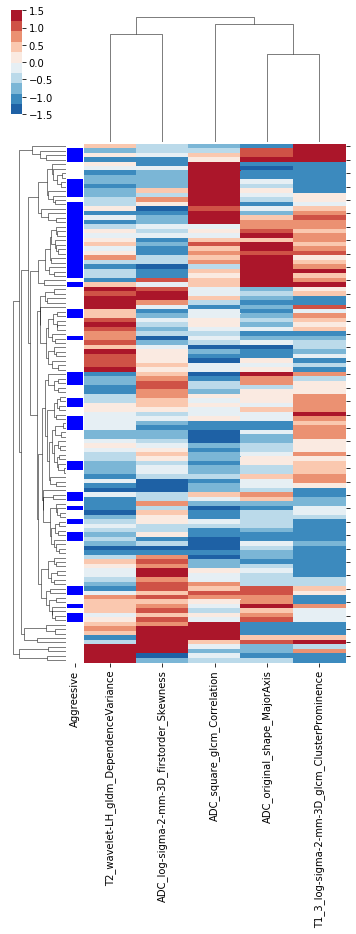

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
a=sns.clustermap(OverlapedFeatures,
               cmap=sns.color_palette('RdBu_r',10),vmin=-1.5,vmax=1.5,figsize=(6,12),row_colors=row_colors)
a.ax_heatmap.set_yticklabels([])
a.ax_heatmap.set_ylabel('')
a.ax_row_colors.set_xticklabels(['Aggreesive'])
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

In [366]:
AggresiveS=OverlapedFeatures[y==1]
None_AggresiveS=OverlapedFeatures[y==0]

In [367]:
AggresiveS.columns

Index(['ADC_square_glcm_Correlation', 'ADC_original_shape_MajorAxis',
       'T2_wavelet-LH_gldm_DependenceVariance',
       'T1_3_log-sigma-2-mm-3D_glcm_ClusterProminence',
       'ADC_log-sigma-2-mm-3D_firstorder_Skewness'],
      dtype='object')

In [371]:
OverlapedFeatures.loc[:,'Group']=y

In [402]:
OverlapedFeatures.to_excel('./Result/OverLappedFeatures_y.xlsx')

In [384]:
Stripplot_Df=pd.DataFrame(OverlapedFeatures.reset_index().set_index(['PatientID','Group']).stack()).reset_index().rename(columns={'level_2':'FeatureName',0:'Value'})

In [385]:
Stripplot_Df.head()

,PatientID,Group,FeatureName,Value
0,100093273,0,ADC_square_glcm_Correlation,-0.982348
1,100093273,0,ADC_original_shape_MajorAxis,-0.032165
2,100093273,0,T2_wavelet-LH_gldm_DependenceVariance,-0.286941
3,100093273,0,T1_3_log-sigma-2-mm-3D_glcm_ClusterProminence,0.606243
4,100093273,0,ADC_log-sigma-2-mm-3D_firstorder_Skewness,-1.589993


In [ ]:
import 

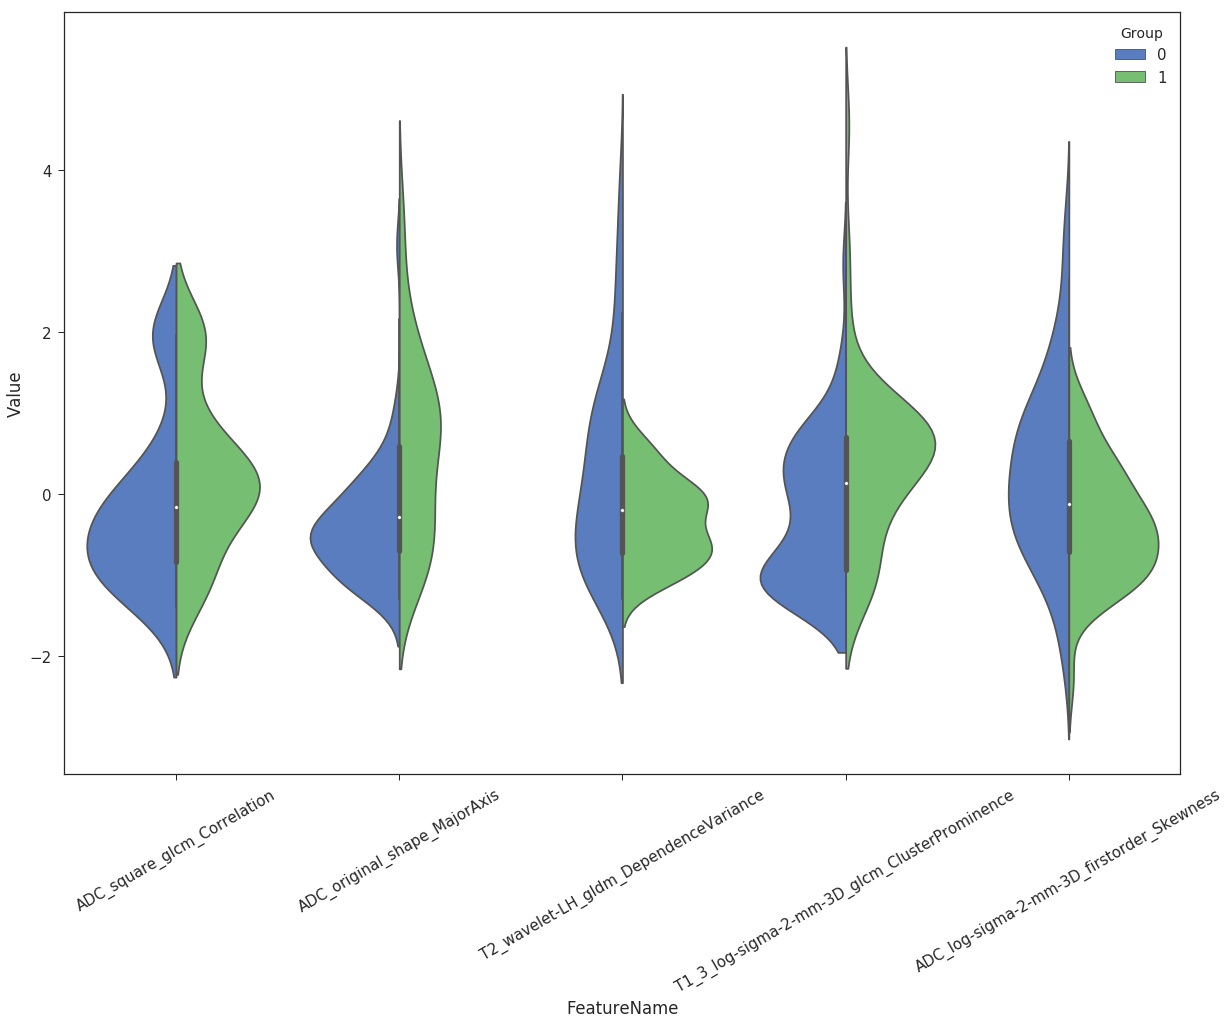

In [400]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,14))
g=sns.violinplot(x="FeatureName", y="Value",hue="Group", data=Stripplot_Df,palette="muted", split=True)
# sns.stripplot(x="FeatureName", y="Value",hue="Group", data=Stripplot_Df, dodge=True, jitter=True, alpha=.40, zorder=1, size=8)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

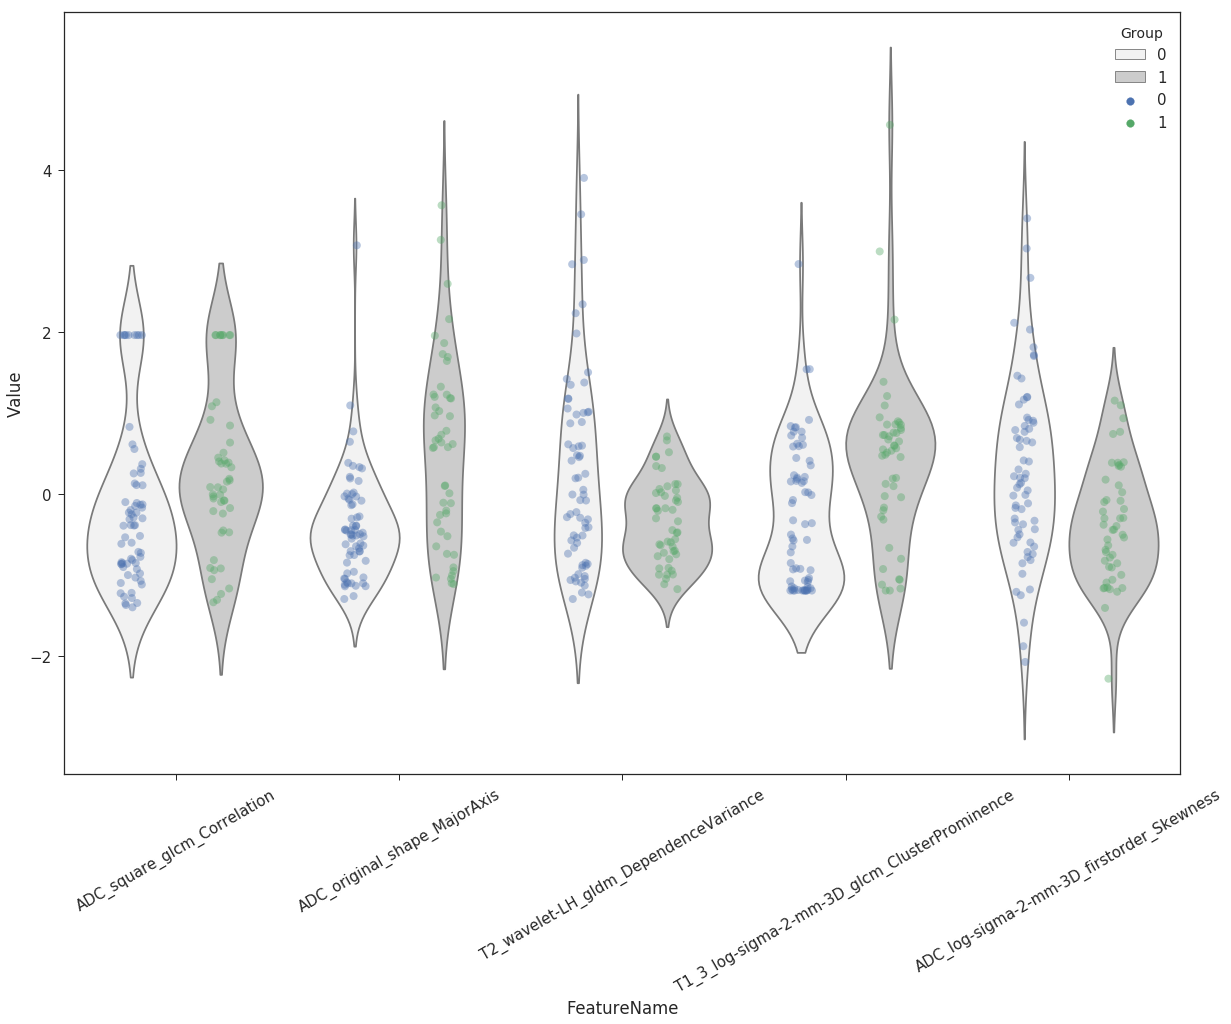

In [401]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,14))
g=sns.violinplot(x="FeatureName", y="Value",hue="Group", data=Stripplot_Df,inner=None, color=".8")
sns.stripplot(x="FeatureName", y="Value",hue="Group", data=Stripplot_Df, dodge=True, jitter=True, alpha=.40, zorder=1, size=8)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

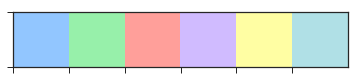

In [439]:
sns.set_palette('pastel')
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [438]:
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [449]:
Stripplot_Df.loc[:,'PatientGroup']=Stripplot_Df.Group.map(dict(zip(set(Stripplot_Df.Group),['Non-aggressive','Aggressive'])))

In [451]:
Stripplot_Df.to_excel('./Result/DateForBoxplot.xlsx')

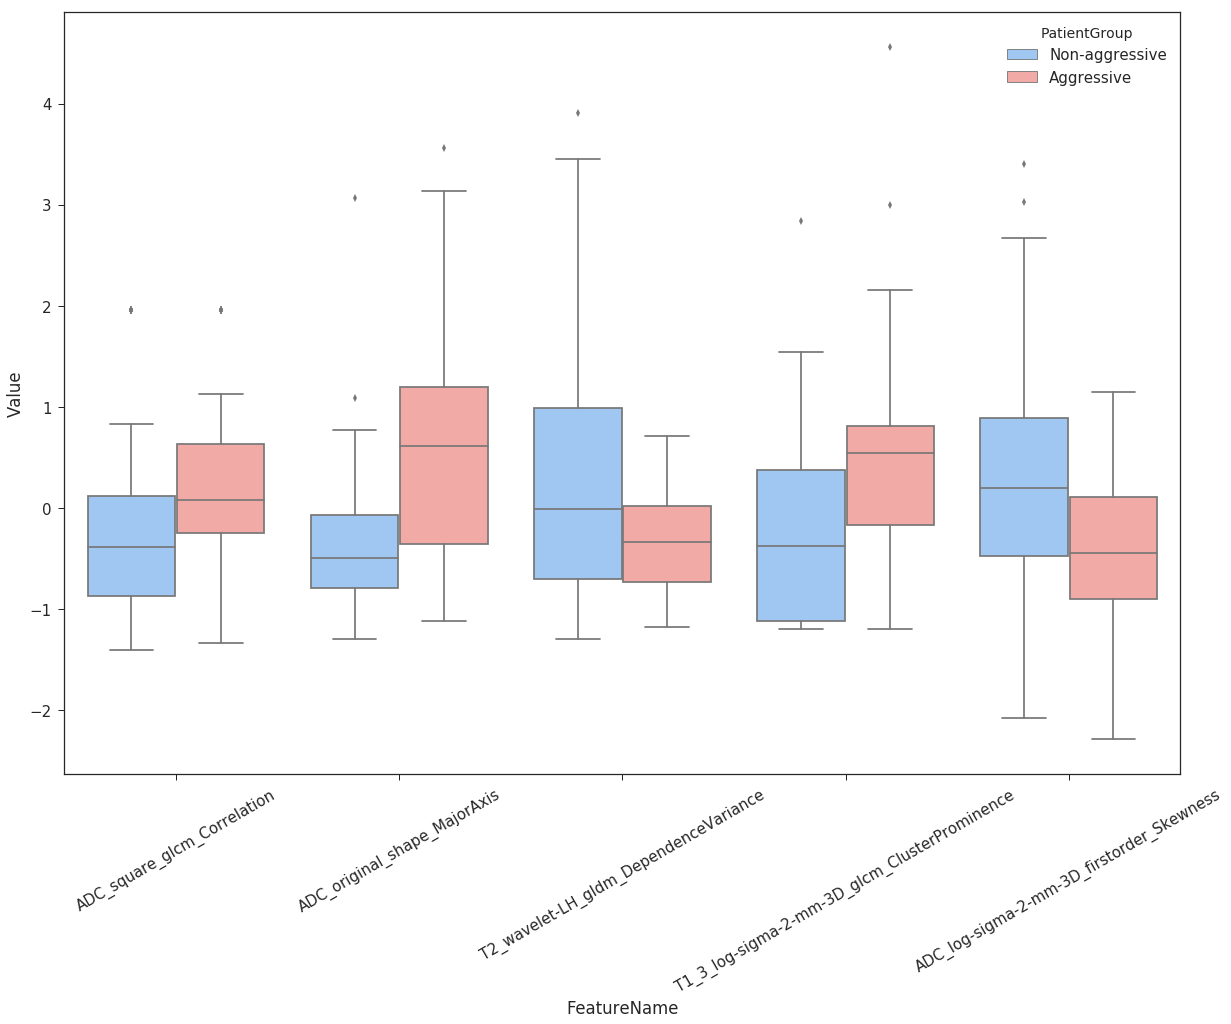

In [450]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,14))
sns.set_palette('pastel')
palette={'Non-aggressive':"C0", 'Aggressive':"C2"}
g=sns.boxplot(x="FeatureName", y="Value",hue="PatientGroup", data=Stripplot_Df,palette=palette)
# sns.stripplot(x="FeatureName", y="Value",hue="Group", data=Stripplot_Df, dodge=True, jitter=True, alpha=.40, zorder=1, size=8)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

In [376]:
data_long.head()

,variable,value
0,control,8
1,control,36
2,control,48
3,control,4
4,control,16


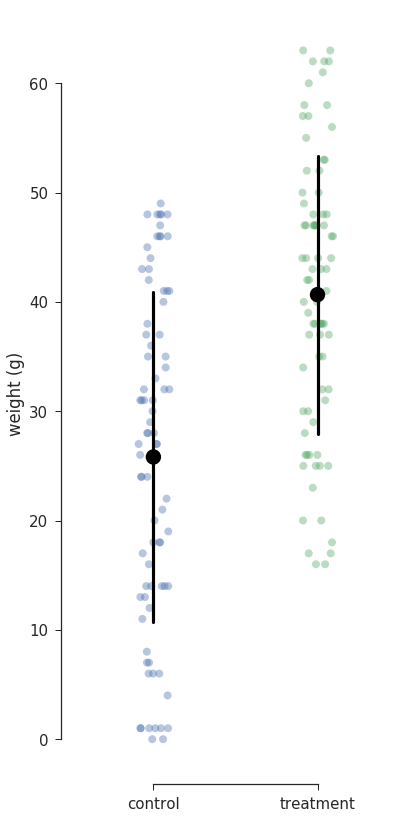

In [363]:


# Create simulated data for control group
random.seed(1)
control = [random.randrange(0,50) for i in range(80)]
# Create simulated data for treatment group
random.seed(2)
treatment = [random.randrange(15,65) for i in range(80)]
# Create dataframe and reshape to use with Seaborn
data = pd.DataFrame({'control': control, 'treatment': treatment})
data_long = pd.melt(data,  value_vars=['control','treatment'])

# Plot using stripplot for subject data, no jitter or dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
fig = plt.figure(figsize=(20,14))
# ax1 = fig.add_subplot(131)
# sns.stripplot(x="variable", y="value", data=data_long, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
# sns.pointplot(x='variable', y='value', ci='sd', data=data_long, join=False, scale=1.5, zorder=100, color='black')
# ax1.set_xlabel('')
# ax1.set_ylabel('weight (g)')
# sns.despine(offset=10, trim=True)
# # Plot using stripplot for subject data with jitter and dodge
# sns.set(font_scale=1.5)
# sns.set_style("ticks")
ax1 = fig.add_subplot(132)
sns.stripplot(x="variable", y="value", data=data_long, dodge=True, jitter=True, alpha=.40, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci='sd', data=data_long, join=False, scale=1.5, zorder=100, color='black')
ax1.set_xlabel('')
ax1.set_ylabel('weight (g)')
sns.despine(offset=10, trim=True)
#Plot using swarmplot for subject data
# ax2 = fig.add_subplot(133)
# sns.swarmplot(x='variable', y="value", data=data_long, alpha=0.40, zorder=1, size=8)
# sns.pointplot(x='variable', y='value', ci='sd', data=data_long, join=False, scale=1.5, zorder=100, color='black')
# ax2.set_xlabel('')
# ax2.set_ylabel('weight (g)')
# sns.despine(offset=10, trim=True)

In [88]:
# T2ADCT1C_3Use1=T2ADCT1C_3Use.drop(419)

In [147]:
# T2ADCT1C_3Use1.to_excel('./Result/PredictionTop5.xlsx')

In [5]:
T2ADCT1C_3HeatMap0=T2ADCT1C.sort_values('AUC_test',ascending=False).loc[(T2ADCT1C.ImageUse=='T2.ADC.T1_3')&
                                                                        (~T2ADCT1C.FeatureSelectionMethod.isin(['SVMLinearL1Select'])),:]

In [6]:
T2ADCT1C_3HeatMap0.head()

,FeatureSelectionMethod,Group,ImageUse,NumberOfImageUse,ResultRawPath,ResultSummaryDf,AUC_Score_test,AUC_Score_train,AUC_test,AUC_train,Accuracy_test,Accuracy_train,MachineLearningAlgorithms,Precision_test,Precision_train,TNR_Specificity_test,TNR_Specificity_train,TPR_Sensitivity_test,TPR_Sensitivity_train
499,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.757692,0.917379,0.923077,0.958689,0.739130,0.924731,NuSVC,0.642857,0.944444,0.615385,0.962963,0.9,0.871795
487,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.884615,1.000000,0.915385,1.000000,0.869565,1.000000,GradientBoostingClassifier,0.769231,1.000000,0.769231,1.000000,1.0,1.000000
485,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.784615,0.974359,0.907692,1.000000,0.782609,0.978495,BaggingClassifier,0.727273,1.000000,0.769231,1.000000,0.8,0.948718
498,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.719231,0.891738,0.907692,0.944444,0.695652,0.903226,SVC,0.600000,0.941176,0.538462,0.962963,0.9,0.820513
504,LassoSelect,1,T2.ADC.T1_3,3,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_...,0.834615,0.860399,0.900000,0.939221,0.826087,0.870968,QuadraticDiscriminantAnalysis,0.750000,0.885714,0.769231,0.925926,0.9,0.794872


In [7]:
HeatmapDf=T2ADCT1C_3HeatMap0.loc[:,['FeatureSelectionMethod','AUC_test','TNR_Specificity_test','TPR_Sensitivity_test','MachineLearningAlgorithms']]

In [117]:
HeatmapDf.head()

,ImageUse,AUC_test,TNR_Specificity_test,TPR_Sensitivity_test,MachineLearningAlgorithms
224,T2,0.728571,0.857143,0.6,RandomForestClassifier
226,T2,0.592857,0.785714,0.4,LogisticRegressionCV
237,T2,0.707143,0.714286,0.7,DecisionTreeClassifier
488,T2.ADC.T1_3,0.784615,0.769231,0.8,RandomForestClassifier
490,T2.ADC.T1_3,0.746154,0.692308,0.8,LogisticRegressionCV


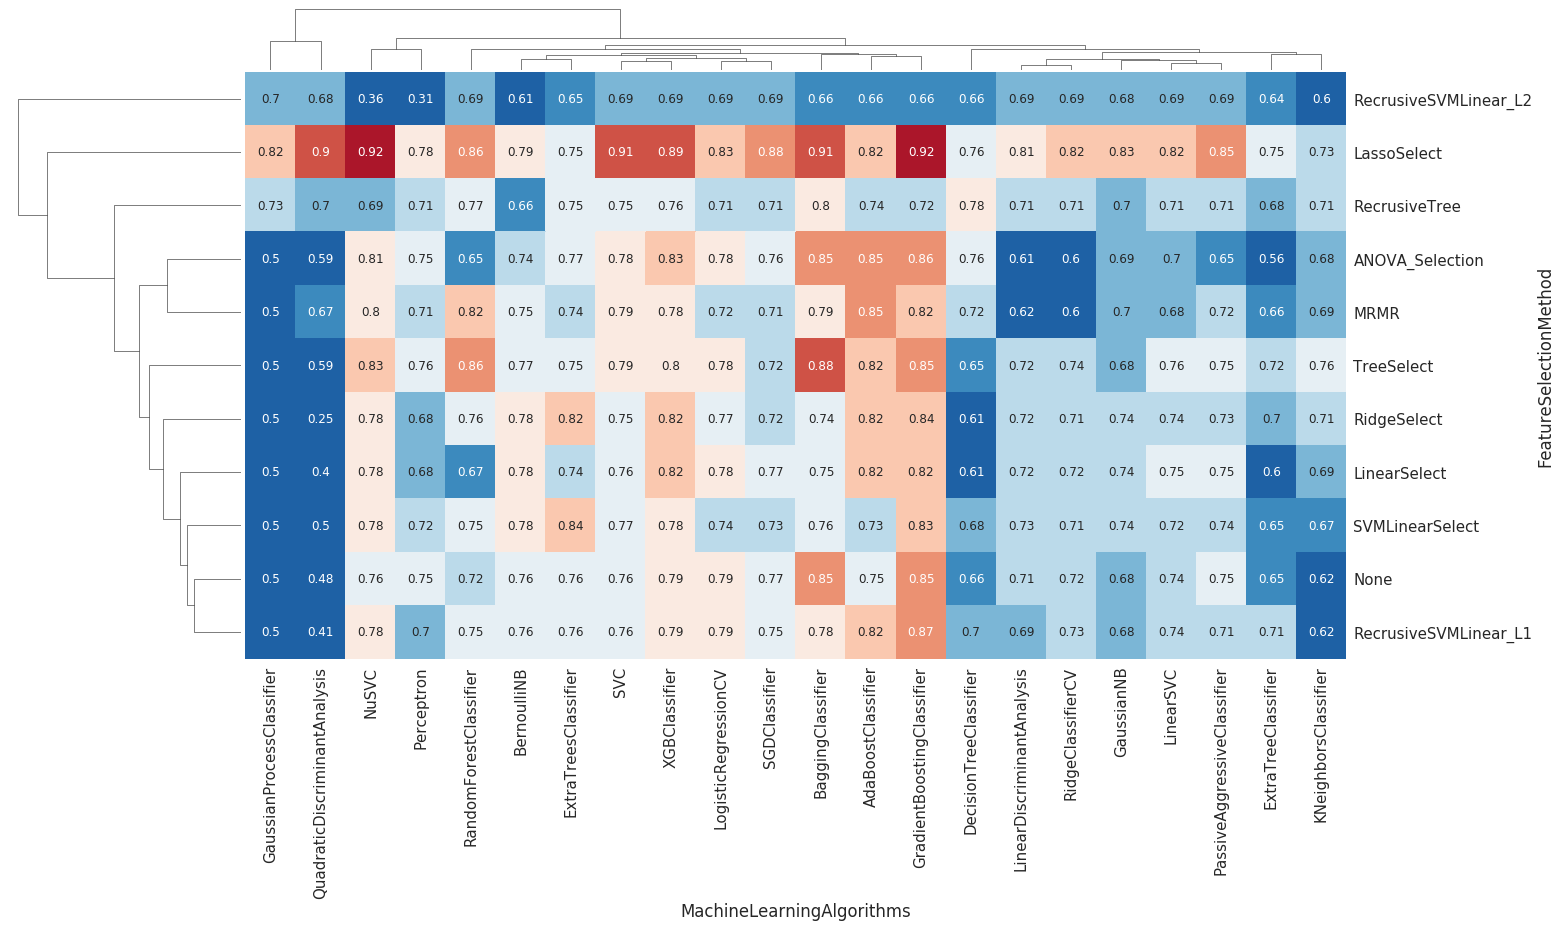

In [28]:
HeatmapDfAUC=HeatmapDf.loc[:,['FeatureSelectionMethod','AUC_test','MachineLearningAlgorithms']].set_index(['FeatureSelectionMethod','MachineLearningAlgorithms']).unstack()
HeatmapDfAUC.columns=HeatmapDfAUC.columns.levels[1]
HeatmapDfAUC.rename(inplace=True,index={'RecrusiveSVMLinear':'RecrusiveSVMLinear_L2','RecrusiveSVMLinearL1':'RecrusiveSVMLinear_L1'})
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
Heatmap=sns.clustermap(HeatmapDfAUC,
               cmap=sns.color_palette('RdBu_r',10),
               vmin=0.6,vmax=0.95,annot=True,annot_kws={"size": 12},
               figsize=(24, 12))
Heatmap.cax.set_visible(False)
plt.show(Heatmap)

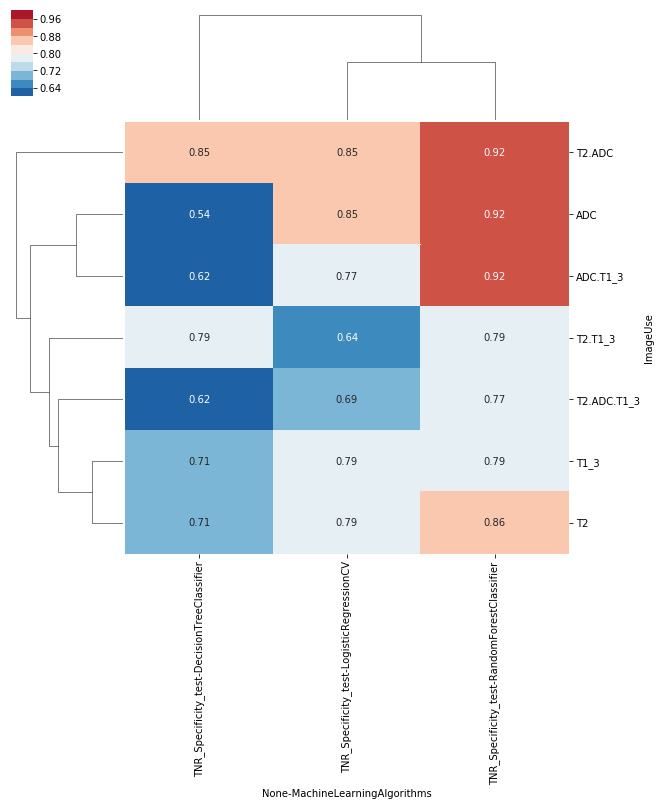

In [134]:
HeatmapDfAUC=HeatmapDf.loc[:,['ImageUse','TNR_Specificity_test','MachineLearningAlgorithms']].set_index(['ImageUse','MachineLearningAlgorithms']).unstack()
import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(HeatmapDfAUC,cmap=sns.color_palette('RdBu_r',10),vmin=0.6,vmax=1,annot=True)
plt.show()

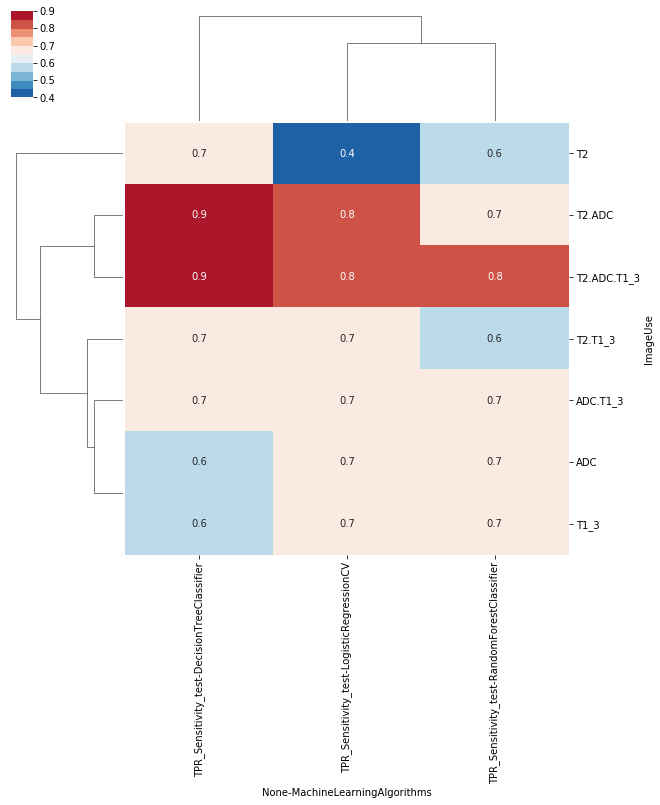

In [136]:

HeatmapDfAUC=HeatmapDf.loc[:,['ImageUse','TPR_Sensitivity_test','MachineLearningAlgorithms']].set_index(['ImageUse','MachineLearningAlgorithms']).unstack()
import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(HeatmapDfAUC,cmap=sns.color_palette('RdBu_r',10),vmin=0.4,vmax=0.9,annot=True)
plt.show()

In [411]:
# import pandas as pd
# BaseInform=pd.read_excel('./BaseInform/Thyroid-radiomics20181105_0.xlsx')

# BaseInform.head()

# import re
# BaseInform0=BaseInform.rename(columns=dict(zip(BaseInform.columns,map(lambda x: re.sub(' ','_',x.strip()),BaseInform.columns))))

# BaseInform0.head()

# BaseInform1=BaseInform0[BaseInform0.Poor_image==0]

# BaseInform1.index=BaseInform1.ID.astype(str)

# BaseInform2=BaseInform1.fillna(0)
BaseInform2_updated=pd.read_excel('./BaseInform/BaseInformUse_20181115.xlsx',index_col=0)

In [412]:
BaseInform2.head()

,ID,gender,age,location,Poor_image,metastasis,ETE,aggressive_pathology,aggressiveness,multi-lesions
ID,,,,,,,,,,
100047450,100047450,F,35,1.0,0,0,0.0,0.0,0,0
100050566,100050566,F,55,3.0,0,0,0.0,0.0,0,0
100093273,100093273,F,77,1.0,0,0,0.0,0.0,0,0
100099752,100099752,F,57,1.0,0,0,0.0,0.0,0,0
100126152,100126152,F,57,3.0,0,1,1.0,0.0,1,1


In [413]:
BaseInform2_updated.head()

,ID.1,gender,age,location,Poor_image,metastasis,ETE,aggressive_pathology,aggressiveness,multi-lesions,Size,TestTrain
ID,,,,,,,,,,,,
100047450,100047450,F,35,Right,0,0,0,0,0,0,17.30,TrainingSet
100050566,100050566,F,55,Isthmus,0,0,0,0,0,0,5.42,TestingSet
100093273,100093273,F,77,Right,0,0,0,0,0,0,11.67,TestingSet
100099752,100099752,F,57,Right,0,0,0,0,0,0,5.77,TrainingSet
100126152,100126152,F,57,Isthmus,0,1,1,0,1,1,7.19,TrainingSet


In [159]:
from future_encoders import OneHotEncoder

In [158]:
import sys
sys.path.append('/home/nye/Documents/Machine_Learning/handson-ml/')

In [200]:
cat_attribs=['gender','location','multi-lesions']
num_attribs=['age']
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler
from future_encoders import OneHotEncoder
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', OneHotEncoder()),
    ])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])


In [201]:
BaseInform2_use=BaseInform2.loc[:,cat_attribs+num_attribs]

In [414]:
cat_attribs=['gender','location','multi-lesions']
num_attribs=['age','Size']
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler
from future_encoders import OneHotEncoder
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', OneHotEncoder()),
    ])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])
BaseInform2_use1=BaseInform2_updated.loc[:,cat_attribs+num_attribs]

In [418]:
ResultList=[]
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection,metrics
scoresList=['accuracy','roc_auc','precision']
G=GradientBoostingClassifier()
ClinalTras=full_pipeline.fit_transform(BaseInform2_use1)

# a.toarray()

ClinalTrasDf=pd.DataFrame(ClinalTras.toarray())
ClinalTrasDf.index=BaseInform2_use.index

Xtrain=pd.read_pickle('/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_3-LassoSelect/XTrain.plk')
Xtrain_clinical=ClinalTrasDf.loc[Xtrain.index,:]
Xtrain_CR=Xtrain_clinical.join(Xtrain)
Xtest=pd.read_pickle('/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_3-LassoSelect/XTest.plk')
Xtest_clinical=ClinalTrasDf.loc[Xtest.index,:]
Xtest_CR=Xtest_clinical.join(Xtest)
Y=pd.read_pickle('/home/nye/Documents/SH_MH_W/BaseInform/yDf.plk')
y_train=Y.loc[Xtrain.index,'y']
y_test=Y.loc[Xtest.index,'y']

for n,X,x in [('Clinical',Xtrain_clinical,Xtest_clinical),
              ('Clinical+Radiomic',Xtrain_CR,Xtest_CR),
              ('Radiomic',Xtrain,Xtest)]:
    cv_results = model_selection.cross_validate(G, X, y_train,
                                                    cv=5,
                                                    scoring=scoresList,
                                                    return_train_score=True)
# train
    a=G.fit(X, y_train)
    y_predict_test = G.predict(x)
    y_predict_train= G.predict(X)
    try:
        y_score_test = a.predict_proba(x)[0:,1]
        y_score_train = a.predict_proba(X)[0:,1]
        
    except:
        y_score_test = a.decision_function(X=x)
        y_score_train = a.decision_function(X=X)
    fpr_test,tpr_test,_=metrics.roc_curve(y_test,y_score_test)
    fpr_train,tpr_train,_=metrics.roc_curve(y_train,y_score_train)
#     AUC=roc_auc_score(y,y_predict)
    roc_auc_test=metrics.auc(fpr_test,tpr_test)
    roc_auc_train=metrics.auc(fpr_train,tpr_train)
    AUCScore_test=metrics.roc_auc_score(y_test,y_predict_test)
    AUCScore_train=metrics.roc_auc_score(y_train,y_predict_train)
    ROC_Result={'FeatureUse_CR':n,'fpr_test':fpr_test,'fpr_train':fpr_train,'y_test':y_test,'y_train':y_train,
                           'tpr_test':tpr_test,'tpr_train':tpr_train,
                           'y_test_predict':y_predict_test,'y_train_predict':y_predict_train,
                           'y_score_test':y_score_test,'y_score_train':y_score_train,
                           'auc_train':roc_auc_train,'auc_test':roc_auc_test}
#                 'auc_score_test':AUCScore_test,'auc_score_train':AUCScore_train}
    ResultList.append(ROC_Result)

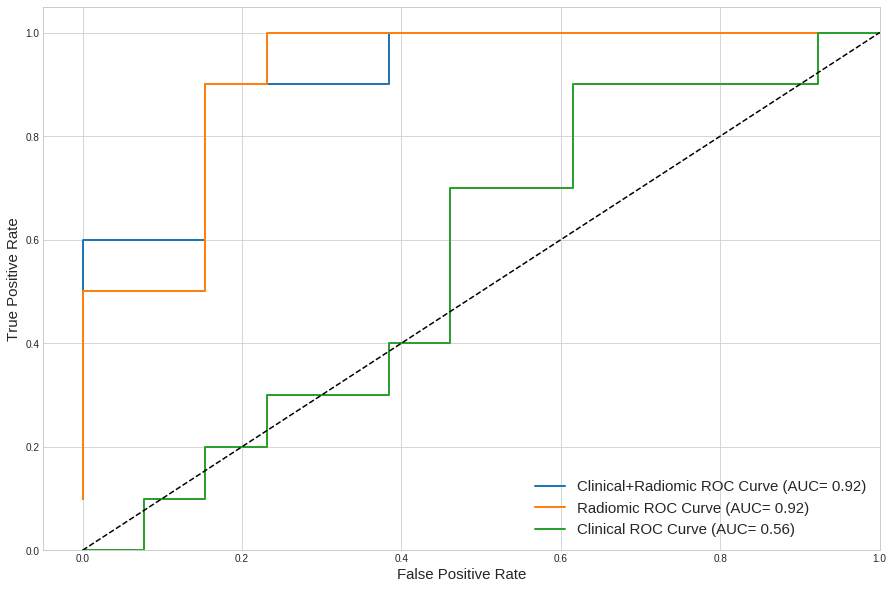

In [3]:
# RadiomicClinicalROC_df1=pd.DataFrame(dict(enumerate(ResultList))).T

# RadiomicClinicalROC_df1.to_pickle('./Result/RadiomicClinicalROC20181115.plk')

import pandas as pd
# RadiomicClinicalROC_df1=pd.read_pickle('./Result/RadiomicClinicalROC20181115.plk')
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))
# ax = plt.axes()
RadiomicClinicalROC_df1=pd.read_pickle('./Result/RadiomicClinicalROC20181115.plk')
Df=RadiomicClinicalROC_df1
for i in Df.sort_values('auc_test',ascending=False).index:
    Features=Df.FeatureUse_CR[i]
    AUC=Df.auc_test[i]
#     Image=RadiomicClinicalROC_df.ImageUse[i]
    plt.plot(Df.fpr_test[i],Df.tpr_test[i],
             lw=2,
             label='%s ROC Curve (AUC= %0.2f)' %(Features,AUC))
    
    plt.xlim([-0.05,1])
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylim([0,1.05])
    plt.ylabel('True Positive Rate',fontsize=15)
#     plt.title('Receiver Operating Curve')
    
    plt.legend(loc='lower right',fontsize=15)
plt.plot([0,1],[0,1],2,linestyle='--',color='black')
plt.show()

In [420]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score
def ReadResult(Df):
    ResultTableUse={}
    n=0    
    for i in Df.index:
        MLA=Df.FeatureUse_CR[i]
        ResultTableUse[n]={'FeatureUse_CR':MLA}
        for g,y in [('test',Y.loc[Xtest.index,'y']),('train',Y.loc[Xtrain.index,'y'])]:
            
            y_predict=Df.loc[i,'y_%s_predict' %g]
            
            temp=pd.Series(list(zip(y,y_predict))).value_counts()
            try:
                tp=temp[(1,1)]
            except:
                tp=0
            try:
                tn=temp[(0,0)]
            except:
                tn=0
            try:
                fp=temp[(0,1)]
            except:
                fp=0
            try:
                fn=temp[(1,0)]
            except:
                fn=0
            AUC=Df.loc[i,'auc_%s' %g]
            AUC_score=roc_auc_score(y,y_predict)
            Precision=precision_score(y,y_predict)#tp / (tp + fp)
            TPR_Sensitivity=recall_score(y,y_predict)#tp / (tp + fn)
            Accuracy=accuracy_score(y,y_predict)
            try:
                TNR_Specificity=tn/(tn+fp)
            except:
                TNR_Specificity=0
            Dict=dict(list(zip(['_'.join([string,g]) for string in ['Precision','TPR_Sensitivity','Accuracy','TNR_Specificity','AUC','AUC_Score']],
                 [Precision,TPR_Sensitivity,Accuracy,TNR_Specificity,AUC,AUC_score])))
            ResultTableUse[n].update(Dict)
        n+=1
    ResultTableUseDf=pd.DataFrame(ResultTableUse).T
    return ResultTableUseDf

RadiomicClinicalPredictDf1=ReadResult(RadiomicClinicalROC_df1)

In [421]:
RadiomicClinicalPredictDf1

,AUC_Score_test,AUC_Score_train,AUC_test,AUC_train,Accuracy_test,Accuracy_train,FeatureUse_CR,Precision_test,Precision_train,TNR_Specificity_test,TNR_Specificity_train,TPR_Sensitivity_test,TPR_Sensitivity_train
0,0.457692,1,0.561538,1,0.478261,1,Clinical,0.375,1,0.615385,1,0.3,1
1,0.807692,1,0.915385,1,0.782609,1,Clinical+Radiomic,0.666667,1,0.615385,1,1,1
2,0.884615,1,0.915385,1,0.869565,1,Radiomic,0.769231,1,0.769231,1,1,1


In [422]:
RadiomicClinicalPredictDf1.to_excel('./Result/RadiomicClinicalPredict20181115.xlsx')

In [341]:
# add clinial
ResultList=[]
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection,metrics
scoresList=['accuracy','roc_auc','precision']
G=GradientBoostingClassifier()
ClinalTras=full_pipeline.fit_transform(BaseInform2_use)

# a.toarray()

ClinalTrasDf=pd.DataFrame(ClinalTras.toarray())
ClinalTrasDf.index=BaseInform2_use.index

Xtrain=pd.read_pickle('/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_3-LassoSelect/XTrain.plk')
Xtrain_clinical=ClinalTrasDf.loc[Xtrain.index,:]
Xtrain_CR=Xtrain_clinical.join(Xtrain)
Xtest=pd.read_pickle('/home2/nye/SH_MH_W/PredictionResult/T2.ADC.T1_3-LassoSelect/XTest.plk')
Xtest_clinical=ClinalTrasDf.loc[Xtest.index,:]
Xtest_CR=Xtest_clinical.join(Xtest)
Y=pd.read_pickle('/home/nye/Documents/SH_MH_W/BaseInform/yDf.plk')
y_train=Y.loc[Xtrain.index,'y']
y_test=Y.loc[Xtest.index,'y']

for n,X,x in [('Clinical',Xtrain_clinical,Xtest_clinical),
              ('Clinical+Radiomic',Xtrain_CR,Xtest_CR),
              ('Radiomic',Xtrain,Xtest)]:
    cv_results = model_selection.cross_validate(G, X, y_train,
                                                    cv=5,
                                                    scoring=scoresList,
                                                    return_train_score=True)
# train
    a=G.fit(X, y_train)
    y_predict_test = G.predict(x)
    y_predict_train= G.predict(X)
    try:
        y_score_test = a.decision_function(X=x)
        y_score_train = a.decision_function(X=X)
    except:
        y_score_test = a.predict_proba(x)[0:,1]
        y_score_train = a.predict_proba(X)[0:,1]
    fpr_test,tpr_test,_=metrics.roc_curve(y_test,y_score_test)
    fpr_train,tpr_train,_=metrics.roc_curve(y_train,y_score_train)
#     AUC=roc_auc_score(y,y_predict)
    roc_auc_test=metrics.auc(fpr_test,tpr_test)
    roc_auc_train=metrics.auc(fpr_train,tpr_train)
    AUCScore_test=metrics.roc_auc_score(y_test,y_predict_test)
    AUCScore_train=metrics.roc_auc_score(y_train,y_predict_train)
    ROC_Result={'FeatureUse_CR':n,'fpr_test':fpr_test,'fpr_train':fpr_train,'y_test':y_test,'y_train':y_train
                           'tpr_test':tpr_test,'tpr_train':tpr_train,
                           'y_test_predict':y_predict_test,'y_train_predict':y_predict_train,
                           'y_score_test':y_score_test,'y_score_train':y_score_train,
                           'auc_train':roc_auc_train,'auc_test':roc_auc_test}
#                 'auc_score_test':AUCScore_test,'auc_score_train':AUCScore_train}
    ResultList.append(ROC_Result)

/home/nye/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [342]:
RadiomicClinicalROC_df=pd.DataFrame(dict(enumerate(ResultList))).T

In [353]:
RadiomicClinicalROC_df.to_pickle('./Result/RadiomicClinicalROC.plk')

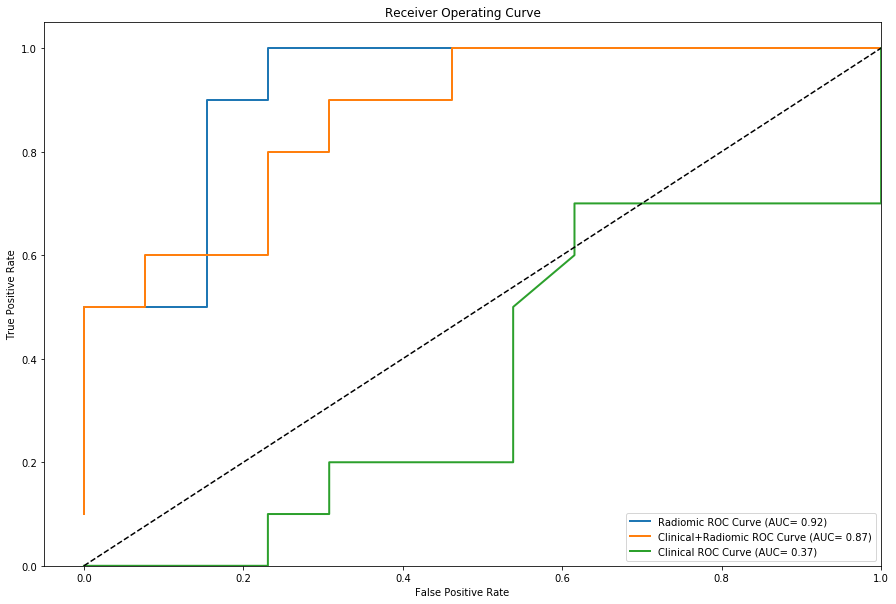

In [344]:
plt.figure(figsize=(15,10))
Df=RadiomicClinicalROC_df
for i in Df.sort_values('auc_test',ascending=False).index:
    Features=Df.FeatureUse_CR[i]
    AUC=Df.auc_test[i]
#     Image=RadiomicClinicalROC_df.ImageUse[i]
    plt.plot(Df.fpr_test[i],Df.tpr_test[i],
             lw=2,
             label='%s ROC Curve (AUC= %0.2f)' %(Features,AUC))
    
    plt.xlim([-0.05,1])
    plt.xlabel('False Positive Rate')
    plt.ylim([0,1.05])
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Curve')
    plt.legend(loc='lower right')
plt.plot([0,1],[0,1],2,linestyle='--',color='black')
plt.show()

In [ ]:
y_train=Y.loc[Xtrain.index,'y']
y_test=Y.loc[Xtest.index,'y']

In [349]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score
def ReadResult(Df):
    ResultTableUse={}
    n=0    
    for i in Df.index:
        MLA=Df.FeatureUse_CR[i]
        ResultTableUse[n]={'FeatureUse_CR':MLA}
        for g,y in [('test',Y.loc[Xtest.index,'y']),('train',Y.loc[Xtrain.index,'y'])]:
            
            y_predict=Df.loc[i,'y_%s_predict' %g]
            
            temp=pd.Series(list(zip(y,y_predict))).value_counts()
            try:
                tp=temp[(1,1)]
            except:
                tp=0
            try:
                tn=temp[(0,0)]
            except:
                tn=0
            try:
                fp=temp[(0,1)]
            except:
                fp=0
            try:
                fn=temp[(1,0)]
            except:
                fn=0
            AUC=Df.loc[i,'auc_%s' %g]
            AUC_score=roc_auc_score(y,y_predict)
            Precision=precision_score(y,y_predict)#tp / (tp + fp)
            TPR_Sensitivity=recall_score(y,y_predict)#tp / (tp + fn)
            Accuracy=accuracy_score(y,y_predict)
            try:
                TNR_Specificity=tn/(tn+fp)
            except:
                TNR_Specificity=0
            Dict=dict(list(zip(['_'.join([string,g]) for string in ['Precision','TPR_Sensitivity','Accuracy','TNR_Specificity','AUC','AUC_Score']],
                 [Precision,TPR_Sensitivity,Accuracy,TNR_Specificity,AUC,AUC_score])))
            ResultTableUse[n].update(Dict)
        n+=1
    ResultTableUseDf=pd.DataFrame(ResultTableUse).T
    return ResultTableUseDf

In [351]:
RadiomicClinicalPredictDf=ReadResult(RadiomicClinicalROC_df)

In [352]:
RadiomicClinicalPredictDf.to_excel('./Result/RadiomicClinicalPredict.xlsx')

In [191]:
import numpy as np
np.unique(np.array(list(zip(y_predict_test,y_test))),return_counts=True)

(array([0, 1]), array([106,  80]))

In [170]:
cv_results

{'fit_time': array([0.07673478, 0.04898095, 0.05322099, 0.05656004, 0.05776262]),
 'score_time': array([0.00428891, 0.0027082 , 0.00287223, 0.00273633, 0.00276589]),
 'test_accuracy': array([1.  , 0.6 , 0.6 , 0.25, 0.25]),
 'test_precision': array([1. , 0.5, 0.5, 0. , 0. ]),
 'test_roc_auc': array([1.  , 0.5 , 1.  , 0.5 , 0.25]),
 'train_accuracy': array([0.94444444, 0.94444444, 0.94444444, 1.        , 1.        ]),
 'train_precision': array([1.        , 0.88888889, 1.        , 1.        , 1.        ]),
 'train_roc_auc': array([0.99375, 0.99375, 0.99375, 1.     , 1.     ])}

In [163]:
set(FinialDfSubset.ImageUse)

{'ADC', 'ADC.T1_3', 'T1_3', 'T2', 'T2.ADC', 'T2.ADC.T1_3', 'T2.T1_3'}

In [175]:
idx=FinialDfSubset.groupby(['ImageUse'])['AUC_test'].transform(max) == FinialDfSubset['AUC_test']
FinialDfSubset_AUCmax=FinialDfSubset[idx].drop_duplicates(['AUC_test','ImageUse'])

In [176]:
FinialDfSubset_AUCmax.columns

Index(['FeatureSelectionMethod', 'Group', 'ImageUse', 'NumberOfImageUse',
       'ResultRawPath', 'ResultSummaryDf', 'AUC_test', 'AUC_train',
       'Accuracy_test', 'Accuracy_train', 'MachineLearningAlgorithms',
       'Precision_test', 'Precision_train', 'TNR_Specificity_test',
       'TNR_Specificity_train', 'TPR_Sensitivity_test',
       'TPR_Sensitivity_train'],
      dtype='object')

In [180]:
RocFinialDf=pd.DataFrame(columns=list(temp0_rocdf.columns)+['ResultRawPath'])
for i in FinialDfSubset_AUCmax.index:
    ResultRawPath=FinialDfSubset_AUCmax.ResultRawPath[i]
    MachineLearningAlgorithms=FinialDfSubset_AUCmax.MachineLearningAlgorithms[i]
    with open(ResultRawPath,'rb') as f:
        temp0=pickle.load(f)
    temp0_rocdf=pd.DataFrame(temp0['ROC_Result']).T
    temp1=temp0_rocdf[temp0_rocdf.MLA==MachineLearningAlgorithms]
    temp1.loc[:,'ResultRawPath']=ResultRawPath
    RocFinialDf=pd.concat([RocFinialDf,temp1],ignore_index=True)

/home/nye/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nye/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [184]:
FinialDfSubset_AUCmaxRoc=pd.merge(FinialDfSubset_AUCmax,RocFinialDf,on='ResultRawPath')

In [185]:
FinialDfSubset_AUCmaxRoc.columns

Index(['FeatureSelectionMethod', 'Group', 'ImageUse', 'NumberOfImageUse',
       'ResultRawPath', 'ResultSummaryDf', 'AUC_test', 'AUC_train',
       'Accuracy_test', 'Accuracy_train', 'MachineLearningAlgorithms',
       'Precision_test', 'Precision_train', 'TNR_Specificity_test',
       'TNR_Specificity_train', 'TPR_Sensitivity_test',
       'TPR_Sensitivity_train', 'MLA', 'auc_test', 'auc_train', 'fpr_test',
       'fpr_train', 'tpr_test', 'tpr_train', 'y_score_test', 'y_score_train',
       'y_test', 'y_test_predict', 'y_train', 'y_train_predict'],
      dtype='object')

In [187]:
FinialDfSubset_AUCmaxRoc.loc[:,['ImageUse','AUC_test','auc_test']]

,ImageUse,AUC_test,auc_test
0,T2,0.728571,0.792857
1,T2.ADC.T1_3,0.784615,0.857692
2,ADC,0.811538,0.796154
3,T1_3,0.742857,0.760714
4,T2.ADC,0.873077,0.873077
5,ADC.T1_3,0.811538,0.876923
6,T2.T1_3,0.742857,0.742857


In [195]:
FinialDfSubset_AUCmaxRoc.sort_values('AUC_test',ascending=False).index[:3]

Int64Index([4, 2, 5], dtype='int64')

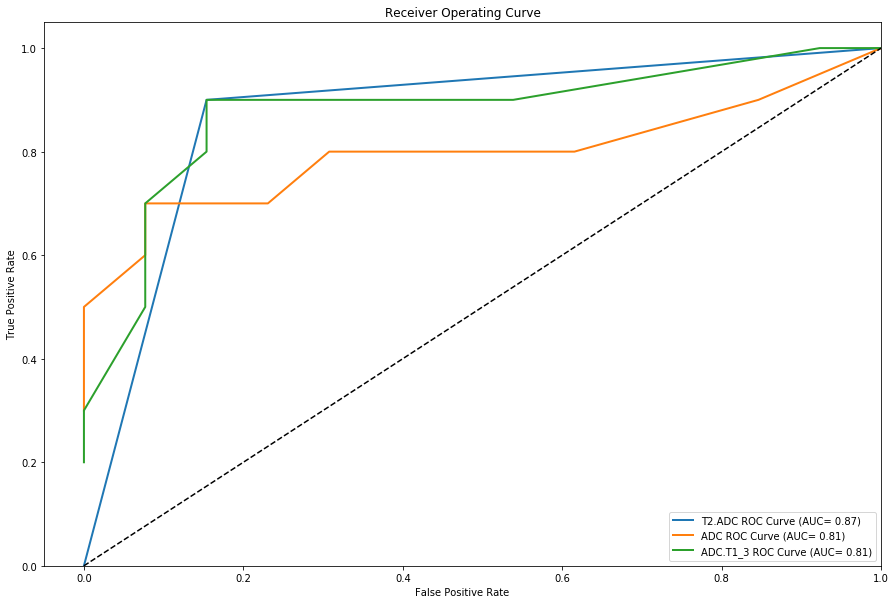

In [202]:
plt.figure(figsize=(15,10))
for i in FinialDfSubset_AUCmaxRoc.sort_values('AUC_test',ascending=False).index[:3]:
    MLA=FinialDfSubset_AUCmaxRoc.MachineLearningAlgorithms[i]
    AUC=FinialDfSubset_AUCmaxRoc.AUC_test[i]
    Image=FinialDfSubset_AUCmaxRoc.ImageUse[i]
    plt.plot(FinialDfSubset_AUCmaxRoc.fpr_test[i],FinialDfSubset_AUCmaxRoc.tpr_test[i],
             lw=2,
             label='%s ROC Curve (AUC= %0.2f)' %(Image,AUC))
    
    plt.xlim([-0.05,1])
    plt.xlabel('False Positive Rate')
    plt.ylim([0,1.05])
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Curve')
    plt.legend(loc='lower right')
plt.plot([0,1],[0,1],2,linestyle='--',color='black')
plt.show()

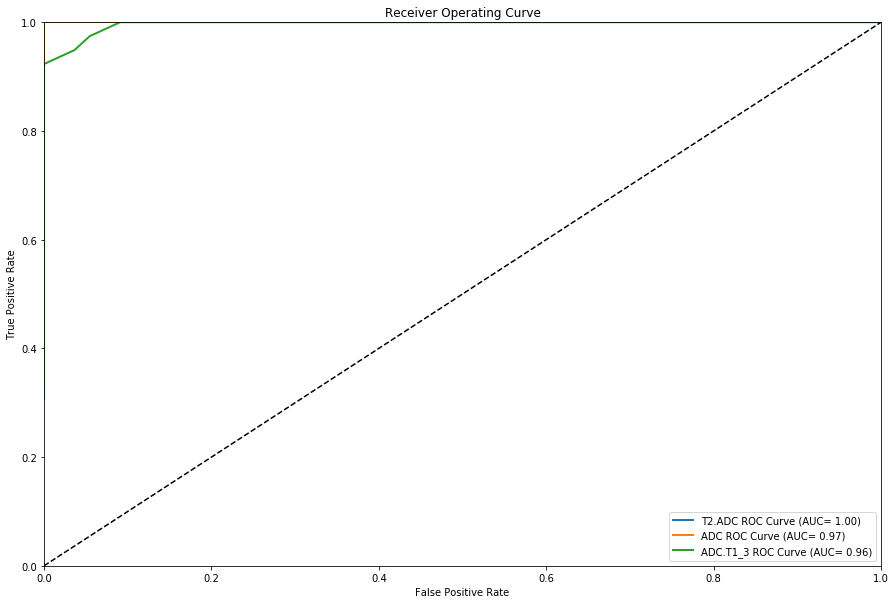

In [200]:
plt.figure(figsize=(15,10))
for i in FinialDfSubset_AUCmaxRoc.sort_values('AUC_test',ascending=False).index[:3]:
    MLA=FinialDfSubset_AUCmaxRoc.MachineLearningAlgorithms[i]
    AUC=FinialDfSubset_AUCmaxRoc.AUC_train[i]
    Image=FinialDfSubset_AUCmaxRoc.ImageUse[i]
    plt.plot(FinialDfSubset_AUCmaxRoc.fpr_train[i],FinialDfSubset_AUCmaxRoc.tpr_train[i],
             lw=2,
             label='%s ROC Curve (AUC= %0.2f)' %(Image,AUC))
    
    plt.xlim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Curve')
    plt.legend(loc='lower right')
plt.plot([0,1],[0,1],2,linestyle='--',color='black')
plt.show()

In [256]:
RadiomicClinicalROC_df.loc[2,'auc_test']=list(T2ADCT1C_3Use.loc[T2ADCT1C_3Use.MachineLearningAlgorithms=='GradientBoostingClassifier','AUC_test'])[0]

In [204]:
FinialDfSubset_AUCmaxRoc.columns

Index(['FeatureSelectionMethod', 'Group', 'ImageUse', 'NumberOfImageUse',
       'ResultRawPath', 'ResultSummaryDf', 'AUC_test', 'AUC_train',
       'Accuracy_test', 'Accuracy_train', 'MachineLearningAlgorithms',
       'Precision_test', 'Precision_train', 'TNR_Specificity_test',
       'TNR_Specificity_train', 'TPR_Sensitivity_test',
       'TPR_Sensitivity_train', 'MLA', 'auc_test', 'auc_train', 'fpr_test',
       'fpr_train', 'tpr_test', 'tpr_train', 'y_score_test', 'y_score_train',
       'y_test', 'y_test_predict', 'y_train', 'y_train_predict'],
      dtype='object')

In [218]:
for i in FinialDfSubset_AUCmaxRoc.index:
    print(len(FinialDfSubset_AUCmaxRoc.y_score_test[i]))

24
23
23
24
23
23
24


TypeError: <lambda>() missing 1 required positional argument: 'height'

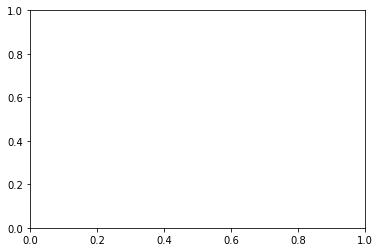

In [219]:
plt.bar(FinialDfSubset_AUCmaxRoc.y_score_test[0])

In [213]:
FinialDfSubset_AUCmaxRocScore.head()

ImageUse,T2,T2.ADC.T1_3,ADC,T1_3,T2.ADC,ADC.T1_3,T2.T1_3
0,"[0.0, 0.7, 0.2, 0.8, 0.2, 0.0, 0.0, 0.9, 0.6, ...",NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"[0.5, 0.0, 0.9, 0.0, 0.1, 0.4, 0.8, 1.0, 0.9, ...",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"[0.5, 0.1, 0.8, 0.3, 0.5, 0.4, 1.0, 1.0, 0.6, ...",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"[0.1, 0.0, 0.1, 0.6, 0.1, 0.6, 0.3, 0.7, 0.7, ...",NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",NaN,NaN


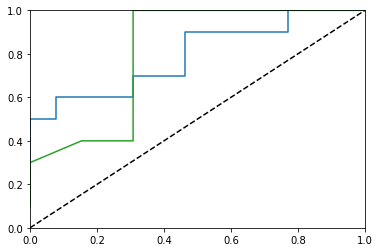

In [152]:

for i in range(2):
    plt.plot(temp0_rocdf.fpr_test[i],temp0_rocdf.tpr_test[i],2)
    
    plt.xlim([0,1])
    plt.ylim([0,1])
plt.plot([0,1],[0,1],2,linestyle='--',color='black')
plt.show()

In [62]:
Temp=pd.read_csv('/home2/nye/SH_MH_W/PredictionResult/T2.B0-LassoSelect/PredictionResultDf.csv',index_col=0)

In [64]:
CSV_Use

,AUC_test,AUC_train,Accuracy_test,Accuracy_train,MachineLearningAlgorithms,Precision_test,Precision_train,TNR_Specificity_test,TNR_Specificity_train,TPR_Sensitivity_test,TPR_Sensitivity_train


In [65]:
MostSignificantDf=pd.DataFrame(columns=list(Temp.columns)+['FilePath'])
Root='/home2/nye/SH_MH_W/PredictionResult/'
for root,folder,files in os.walk(Root):
    if 'PredictionResultDf.csv' in files:
        FilePath=os.path.join(root,'PredictionResultDf.csv')
        CSV=pd.read_csv(FilePath,index_col=0)
        CSV_Use=CSV.loc[(CSV.AUC_test>0.8)&(CSV.Accuracy_test>0.8),:]
        if len(CSV_Use)==0:
            
        try:
            CSV_Use.loc[:,'FilePath']=FilePath
            MostSignificantDf=pd.concat([MostSignificantDf,CSV_Use],ignore_index=True)
        except:
            pass

/home/nye/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nye/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [69]:
MostSignificantDfUse=MostSignificantDf.sort_values('AUC_test',ascending=False)

In [73]:
MostSignificantDfUse.head()

,AUC_test,AUC_train,Accuracy_test,Accuracy_train,MachineLearningAlgorithms,Precision_test,Precision_train,TNR_Specificity_test,TNR_Specificity_train,TPR_Sensitivity_test,TPR_Sensitivity_train,FilePath
754,0.923077,1.000000,0.913043,1.000000,GaussianProcessClassifier,0.833333,1.000,0.846154,1.000000,1.0,1.000000,/home2/nye/SH_MH_W/PredictionResult/T2.B0-MRMR...
619,0.911538,0.974359,0.913043,0.978723,BaggingClassifier,0.900000,1.000,0.923077,1.000000,0.9,0.948718,/home2/nye/SH_MH_W/PredictionResult/ADC.T1_3.T...
655,0.911538,0.990909,0.913043,0.989362,BaggingClassifier,0.900000,0.975,0.923077,0.981818,0.9,1.000000,/home2/nye/SH_MH_W/PredictionResult/B800.T1_3-...
671,0.911538,0.987179,0.913043,0.989362,XGBClassifier,0.900000,1.000,0.923077,1.000000,0.9,0.974359,/home2/nye/SH_MH_W/PredictionResult/ADC.B0.T1_...
42,0.911538,1.000000,0.913043,1.000000,ExtraTreesClassifier,0.900000,1.000,0.923077,1.000000,0.9,1.000000,/home2/nye/SH_MH_W/PredictionResult/B800.T1_1-...


In [80]:
MostSignificantDfUse.rename(columns={'FilePath':'ResultSummaryDf'},inplace=True)

In [78]:
ResultFileSummaryDf.head()

,FeatureSelectionMethod,Group,ImageUse,NumberOfImageUse,ResultRawPath,ResultSummaryDf
0,None,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...
1,ANOVA_Selection,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...
2,RecrusiveSVMLinear,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...
3,RecrusiveSVMLinearL1,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...
4,RecrusiveTree,1,ADC.B800.B0.T1_3,4,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...,/home2/nye/SH_MH_W/PredictionResult/ADC.B800.B...


In [82]:
FinialDf=pd.merge(ResultFileSummaryDf,MostSignificantDfUse,on='ResultSummaryDf')

In [83]:
FinialDf.to_excel('./BaseInform/FinialDf.xlsx')

In [85]:
MostSignificantDf_AUC=pd.DataFrame(columns=list(Temp.columns)+['FilePath'])
Root='/home2/nye/SH_MH_W/PredictionResult/'
for root,folder,files in os.walk(Root):
    if 'PredictionResultDf.csv' in files:
        FilePath=os.path.join(root,'PredictionResultDf.csv')
        CSV=pd.read_csv(FilePath,index_col=0)
        CSV_Use=CSV.loc[CSV.AUC_test==CSV.AUC_test.max(),:]
#         if len(CSV_Use)==0:
            
        try:
            CSV_Use.loc[:,'FilePath']=FilePath
            MostSignificantDf_AUC=pd.concat([MostSignificantDf_AUC,CSV_Use],ignore_index=True)
        except:
            pass

/home/nye/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nye/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
# MostSignificantDfUse=MostSignificantDf.sort_values('AUC_test',ascending=False)

# MostSignificantDfUse.head()

MostSignificantDf_AUC.rename(columns={'FilePath':'ResultSummaryDf'},inplace=True)
FinialDf_all=pd.merge(ResultFileSummaryDf,MostSignificantDf_AUC,on='ResultSummaryDf')
FinialDf_all.to_excel('./BaseInform/FinialDf_All.xlsx')

In [26]:
call(['/home/nye/Documents/Machine_Learning/PredictionPipeline.py',
      '-X','/home/nye/Documents/SH_MH_W/Test/test_predict/XTrain.plk',
      '-x','/home/nye/Documents/SH_MH_W/Test/test_predict/XTest.plk',
      '-Y','/home/nye/Documents/SH_MH_W/Test/test_predict/yDf.plk','-o','/home/nye/Documents/SH_MH_W/Test/test_predict/'])

1

In [38]:
with open('./Test/test_predict/PredictionResultDict.plk','rb') as f:
    PredictionResult=pickle.load(f)

In [39]:
PredictionResult.keys()

dict_keys(['ROC_Result', 'MLA_compare', 'MLA'])

In [37]:
PredictionResult['ROC_Result']

,MLA_Name,MLA_Parameters,MLA_TrainAccuracy_Mean,MLA_TestAccuracy_Mean,MLA_TestAccuracy_Std,MLA_TrainAUC_Mean,MLA_TestAUC_Mean,MLA_TestAUC_Std,MLA_TrainPrecision_Mean,MLA_TestPrecision_Mean,MLA_TestPrecision_Std,MLA_Time
0,AdaBoostClassifier,"{'n_estimators': 50, 'base_estimator': None, '...",1,0.645201,0.0390437,1,0.713312,0.0534838,1,0.592063,0.0653691,0.690802
19,LinearDiscriminantAnalysis,"{'solver': 'svd', 'priors': None, 'n_component...",0.827952,0.696594,0.105391,0.921517,0.697338,0.0678761,0.799472,0.688095,0.157647,0.0132936
11,BernoulliNB,"{'binarize': 0.0, 'alpha': 1.0, 'fit_prior': T...",0.706828,0.675542,0.0673586,0.734309,0.689058,0.052436,0.6597,0.604286,0.066294,0.00489826
6,LogisticRegressionCV,"{'scoring': None, 'n_jobs': 1, 'verbose': 0, '...",0.872973,0.611146,0.0706697,0.930683,0.664286,0.051942,0.901328,0.610909,0.200281,0.411946
14,SVC,"{'kernel': 'rbf', 'C': 1.0, 'verbose': False, ...",0.80377,0.604334,0.0768251,0.948591,0.647338,0.0399123,0.922771,0.553333,0.172369,0.0674596
12,GaussianNB,{'priors': None},0.741963,0.665015,0.0768501,0.780776,0.635552,0.0640154,0.811823,0.686667,0.198438,0.00326076
21,XGBClassifier,"{'reg_alpha': 0, 'n_jobs': 1, 'colsample_bytre...",1,0.620433,0.108202,1,0.635195,0.0845216,1,0.566667,0.169967,0.640414
7,PassiveAggressiveClassifier,"{'warm_start': False, 'loss': 'hinge', 'C': 1....",0.94623,0.645201,0.0696312,0.987709,0.625649,0.0554862,0.93106,0.561364,0.0687481,0.00509281
2,ExtraTreesClassifier,"{'warm_start': False, 'oob_score': False, 'n_j...",1,0.64644,0.0648649,1,0.613604,0.100904,1,0.605714,0.0922581,0.0219706
15,NuSVC,"{'kernel': 'rbf', 'verbose': False, 'probabili...",0.997297,0.612384,0.0706642,0.99985,0.606364,0.0721196,1,0.537143,0.104041,0.0691762


In [35]:
PredictionResult['MLA'][0]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [36]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score
def ReadResult(Df):
    ResultTableUse={}
    n=0    
    for i in Df.index:
        MLA=Df.MLA[i]
        ResultTableUse[n]={'MachineLearningAlgorithms':MLA}
        for g in ['test','train']:
            y=Df.loc[i,'y_%s' %g]
            y_predict=Df.loc[i,'y_%s_predict' %g]
            
            temp=pd.Series(list(zip(y,y_predict))).value_counts()
            try:
                tp=temp[(1,1)]
            except:
                tp=0
            try:
                tn=temp[(0,0)]
            except:
                tn=0
            try:
                fp=temp[(0,1)]
            except:
                fp=0
            try:
                fn=temp[(1,0)]
            except:
                fn=0
            AUC=roc_auc_score(y,y_predict)
            Precision=precision_score(y,y_predict)#tp / (tp + fp)
            TPR_Sensitivity=recall_score(y,y_predict)#tp / (tp + fn)
            Accuracy=accuracy_score(y,y_predict)
            try:
                TNR_Specificity=tn/(tn+fp)
            except:
                TNR_Specificity=0
            Dict=dict(list(zip(['_'.join([string,g]) for string in ['Precision','TPR_Sensitivity','Accuracy','TNR_Specificity','AUC']],
                 [Precision,TPR_Sensitivity,Accuracy,TNR_Specificity,AUC])))
            ResultTableUse[n].update(Dict)
        n+=1
    ResultTableUseDf=pd.DataFrame(ResultTableUse).T
    return ResultTableUseDf

# tuple(list((1,2)))

# dict(list(zip([1,2],[2,3])))

# Result3={}
# for i in Result2.keys():
#     for FeatureSelectMethod in Result2[i].keys():
#         Df=pd.DataFrame(Result2[i][FeatureSelectMethod][0]).T
#         Result3[tuple(list(i)+[FeatureSelectMethod])]=ReadResult(Df)

# with open('./PredictionResultDf20181023.plk','wb') as f:
#     pickle.dump(Result3,f,protocol=2)

# list(Result3[('T2', 'T2', 'ANOVA_Selection')].columns)+['Ser','FeatureSelectionMethod']

# MostSignificantDf=pd.DataFrame(columns=list(Result3[('T2', 'T2', 'ANOVA_Selection')].columns)+['Ser','FeatureSelectionMethod'])

# for i in Result3.keys():
#     temp=Result3[i].loc[Result3[i].AUC_test==Result3[i].AUC_test.max(),:]
#     temp.loc[:,'Ser']='_'.join(i[:-1])
#     temp.loc[:,'FeatureSelectionMethod']=i[-1]
#     MostSignificantDf=pd.concat([MostSignificantDf_AUC,temp],ignore_index=True)
    

# MostSignificantDf.to_excel('./MostSignificantDf_AUCBased.xlsx')

# pd.DataFrame(columns=Result3[('T2', 'T2', 'ANOVA_Selection')].columns)